In [1]:
import sys, ssl, urllib
import matplotlib.pyplot as plt

In [2]:
ssl._create_default_https_context = ssl._create_unverified_context

In [15]:
url = "https://ceiba.ntu.edu.tw/course/481ea4/hw1_data.csv"
# ref: http://www.gegugu.com/2016/12/28/23379.html
resp = urllib.request.urlopen(url)
resp_byte = resp.read()
dat_raw = resp_byte.decode("utf-8")
class_arr = ["Education Level", "Average Monthly Income","Working Environment"]
e_level = ["elementary school and below", "junior high", "senior high", "university", "graduate school and above"]
a_level = ["20000 and below", "20001-40000", "40001 and above"]
w_level = ["indoor", "outdoor", "unemployed"]
type_dict = dict({"l":"Line Chart", "b":"Bar Chart", "p":"Pie Chart"})

In [4]:
dat = dat_raw.split("\n")
print(dat)

['class,male population,male smoke percentage,female population,female smoke percentage', 'Education level,,,,', 'elementary school and below,1596.00 ,25.30 ,2781.00 ,1.70 ', 'junior high,1264.00 ,49.60 ,1498.00 ,10.60 ', 'senior high,3136.00 ,28.70 ,3734.00 ,6.50 ', 'university,2881.00 ,11.70 ,3249.00 ,1.00 ', 'graduate school and above,964.00 ,4.60 ,659.00 ,0.00 ', 'Average monthly income,,,,', '20000 and below,3737.00 ,20.20 ,6382.00 ,2.50 ', '20001-40000,3431.00 ,33.90 ,4278.00 ,6.80 ', '40001 and above,3615.00 ,35.60 ,2227.00 ,5.50 ', 'Working environment,,,,', 'indoor,3739.00 ,32.40 ,4732.00 ,3.60 ', 'outdoor,1773.00 ,40.90 ,635.00 ,9.00 ', 'unemployed,1595.00 ,29.50 ,4114.00 ,4.70 ', '']


In [5]:
myclass = dat[0].split(",")
# ee = dat[2].split(",")
# ej = dat[3].split(",")
# es = dat[4].split(",")
# eu = dat[5].split(",")
# eg = dat[6].split(",")
# a2 = dat[8].split(",")
# a4 = dat[9].split(",")
# a6 = dat[10].split(",")
# wi = dat[12].split(",")
# wo = dat[13].split(",")
# wu = dat[14].split(",")
arr = []
for i in [2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 14]:
    tmp = dat[i].split(",")
    tmp.pop(0)
    tmp2 = [float(i) for i in tmp]
    arr.append(tmp2)

In [17]:
def print_bar(mytype):

    n_groups = 5
    shift = 0
    
    if mytype == 0:
        n_groups = 5
        shift = 0
    elif mytype == 1:
        n_groups = 3
        shift = 5
    elif mytype == 2:
        n_groups = 3
        shift = 8

    d1 = []
    d2 = []
    for i in range(0, n_groups):
        d1.append(arr[i + shift][1])
        d2.append(arr[i + shift][3])
    d3 = []
    for i in range(n_groups):
        d3.append((arr[i][0] * arr[i][1] + arr[i][2] * arr[i][3]) / (arr[i][0] + arr[i][2]))

    # create plot
    fig, ax = plt.subplots()
    ind = []
    for i in range(0, n_groups):
        ind.append(i)
    bar_width = 0.15
    opacity = 0.8

    rects1 = plt.bar(ind, d1, bar_width,
                     alpha=opacity,
                     color='b',
                     label='Male')
    for i in range(0, n_groups):
        ind[i] += 0.2
    rects2 = plt.bar(ind, d2, bar_width,
                     alpha=opacity,
                     color='r',
                     label='Female')
    for i in range(0, n_groups):
        ind[i] += 0.2
    rects3 = plt.bar(ind, d3, bar_width,
                     alpha=opacity,
                     color='g',
                     label='Total')

    def autolabel(rects):
        """
        Attach a text label above each bar displaying its height
        """
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                    '%.1f' % float(height),
                    ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)

    plt.xlabel(class_arr[mytype])
    plt.ylabel('Smoking Percentage (%)')
    plt.title('Smoking Percentage v.s. ' + class_arr[mytype])
    if mytype == 0:
        plt.xticks(ind, (e_level[0],e_level[1],e_level[2],e_level[3],e_level[4]))
    elif mytype == 1:
        plt.xticks(ind, (a_level[0], a_level[1], a_level[2]))
    elif mytype == 2:
        plt.xticks(ind, (w_level[0], w_level[1], w_level[2]))
    plt.legend()

    plt.tight_layout()
    plt.show()

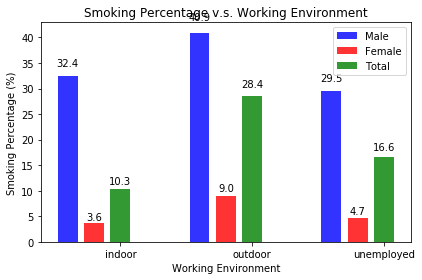

In [20]:
print_bar(2)